In [1]:
%matplotlib inline
#import libraries
import scipy.io.wavfile as wav
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from skimage.util.shape import view_as_windows
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
import tensorflow as tf
import librosa
import librosa.display
from scipy import misc
import pandas as pd
from matplotlib.pyplot import specgram
import math
import matplotlib.image as mpimg

# Preprocessing
The goal of this section is to import the data, crop it down to a shorter length (~3 minutes), pull out many 200ms samples of speaking from each data sample, and label it (0-9) as a speaker.

In [2]:
"""
This cell is only for creating the data the first time. It will only create data if create_data is set to True
"""
create_data = False #only set this to True if you have the original files


def import_data():
    #import the data
    #x, fs = librosa.load('data/voice_01.wav', sr = 48000)
    voice_01 = wav.read('data/voice_01_carl_manchester.wav')
    voice_02 = wav.read('data/voice_02_sam_stinson.wav')
    voice_03 = wav.read('data/voice_03_bill_boerst.wav')
    voice_04 = wav.read('data/voice_04_kandice_stehlik.wav')
    voice_05 = wav.read('data/voice_05_julia_niedermaier.wav')
    voice_06 = wav.read('data/voice_06_inah_derby.wav')
    voice_07 = wav.read('data/voice_07_gabriela_cowan.wav')
    voice_08 = wav.read('data/voice_08_tara_dow.wav')
    voice_09 = wav.read('data/voice_09_don_jenkins.wav')
    voice_10 = wav.read('data/voice_10_john_lieder.wav')
    
    #inspect the data
    voices = [voice_01, voice_02, voice_03, voice_04, voice_05, voice_06, voice_07, voice_08, voice_09, voice_10]
    for voice_file in voices:
        print('Sample Rate:', voice_file[0], ':::', 'Shape of Array:', voice_file[1].shape) #2 channel audio
        
    #cut the data to be 3 minutes in length
    #3 minutes is 180 seconds
    target_length = 180
    
    voices_short = []
    for voice_file in voices:
        samples_per_second = voice_file[0]
        target_samples = samples_per_second * target_length
        new_voice = np.delete(voice_file[1], np.s_[target_samples::], 0)
        voices_short.append(new_voice)
    
    print("Saving")
    print("")
    #save the data as a new .wav
    #librosa.output.write_wav('./librosa_test_audio.wav', x, sr = fs)
    wav.write('data/voice_01.wav', rate = 48000, data = voices_short[0])
    wav.write('data/voice_02.wav', rate = 48000, data = voices_short[1])
    wav.write('data/voice_03.wav', rate = 48000, data = voices_short[2])
    wav.write('data/voice_04.wav', rate = 48000, data = voices_short[3])
    wav.write('data/voice_05.wav', rate = 48000, data = voices_short[4])
    wav.write('data/voice_06.wav', rate = 48000, data = voices_short[5])
    wav.write('data/voice_07.wav', rate = 48000, data = voices_short[6])
    wav.write('data/voice_08.wav', rate = 48000, data = voices_short[7])
    wav.write('data/voice_09.wav', rate = 48000, data = voices_short[8])
    wav.write('data/voice_10.wav', rate = 48000, data = voices_short[9])
    print("Finished Saving")
    
if create_data == True:
    import_data()

In [3]:
#load the .wav data
print("Loading...")
print("")
#x, fs = librosa.load('data/voice_01.wav', sr = 48000)
#voice_00 = wav.read('data/voice_01.wav')
voice_00 = librosa.load('data/voice_01.wav', sr = 48000)
#voice_01 = wav.read('data/voice_02.wav')
voice_01 = librosa.load('data/voice_02.wav', sr = 48000)
#voice_02 = wav.read('data/voice_03.wav')
voice_02 = librosa.load('data/voice_03.wav', sr = 48000)
#voice_03 = wav.read('data/voice_04.wav')
voice_03 = librosa.load('data/voice_04.wav', sr = 48000)
#voice_04 = wav.read('data/voice_05.wav')
voice_04 = librosa.load('data/voice_05.wav', sr = 48000)
#voice_05 = wav.read('data/voice_06.wav')
voice_05 = librosa.load('data/voice_06.wav', sr = 48000)
#voice_06 = wav.read('data/voice_07.wav')
voice_06 = librosa.load('data/voice_07.wav', sr = 48000)
#voice_07 = wav.read('data/voice_08.wav')
voice_07 = librosa.load('data/voice_08.wav', sr = 48000)
#voice_08 = wav.read('data/voice_09.wav')
voice_08 = librosa.load('data/voice_09.wav', sr = 48000)
#voice_09 = wav.read('data/voice_10.wav')
voice_09 = librosa.load('data/voice_10.wav', sr = 48000)
print("Loaded")
print("")

#inspect the data
voices = [voice_00, voice_01, voice_02, voice_03, voice_04, voice_05, voice_06, voice_07, voice_08, voice_09]
for voice_file in voices:
    print('Sample Rate:', voice_file[1], '|', 'Shape of Array:', voice_file[0].shape) #2 channel audio

Loading...

Loaded

Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)
Sample Rate: 48000 | Shape of Array: (8640000,)


In [4]:

all_voice_files = []
for voice in voices:
    all_voice_files.append(voice[0])
    
#Convert Stereo files to Mono files
    
#    temp_voice = voice[0]
#    temp_voice.astype(float)
#    temp_voice = temp_voice.sum(axis = 1) / 2
#    all_voice_files.append(temp_voice)

In [5]:
#look at the attributes of each file
#min, max, mean, standard deviation
indexer = 0
for voice in all_voice_files:
    print("Sample", indexer, "|", "Mean:", np.mean(voice), "|", "Max:", np.max(voice), "|", \
          "Min:", np.min(voice), "|", "Std Dev:", np.std(voice))
    indexer += 1

Sample 0 | Mean: 4.7798e-06 | Max: 0.921265 | Min: -0.568451 | Std Dev: 0.054303
Sample 1 | Mean: -0.000265499 | Max: 0.655914 | Min: -0.826019 | Std Dev: 0.0718488
Sample 2 | Mean: -2.16062e-06 | Max: 0.415649 | Min: -0.389709 | Std Dev: 0.0545702
Sample 3 | Mean: 3.46726e-06 | Max: 0.404083 | Min: -0.415283 | Std Dev: 0.0441317
Sample 4 | Mean: -1.86775e-06 | Max: 0.313354 | Min: -0.281219 | Std Dev: 0.0373589
Sample 5 | Mean: -1.82573e-06 | Max: 0.499573 | Min: -0.460754 | Std Dev: 0.0461007
Sample 6 | Mean: -4.45101e-07 | Max: 0.445007 | Min: -0.399445 | Std Dev: 0.0423917
Sample 7 | Mean: -9.76085e-06 | Max: 0.526245 | Min: -0.542969 | Std Dev: 0.0462241
Sample 8 | Mean: -1.01553e-05 | Max: 0.237549 | Min: -0.228149 | Std Dev: 0.0333488
Sample 9 | Mean: -5.33811e-06 | Max: 0.865387 | Min: -0.811523 | Std Dev: 0.0500287


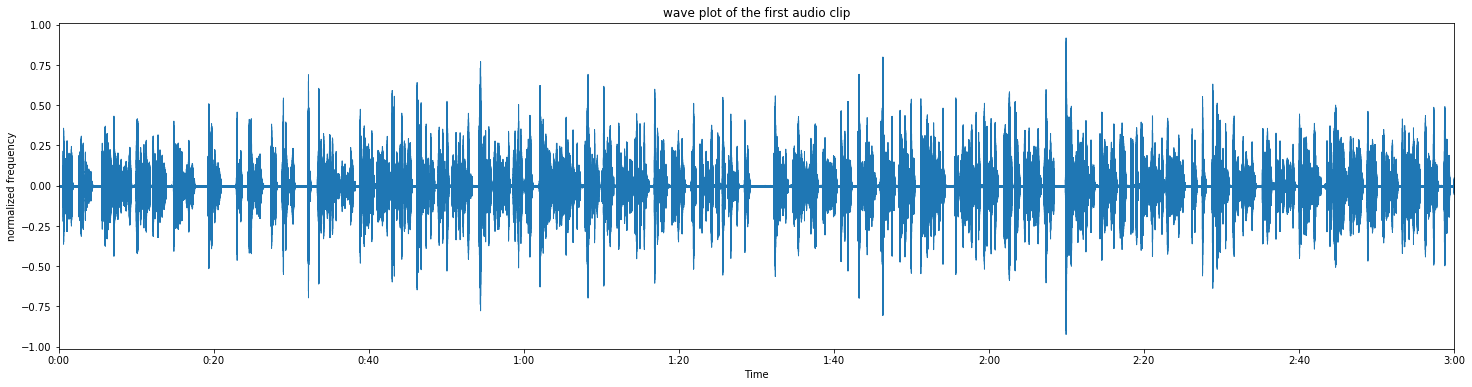

C:\Users\wluckow\Anaconda\Anaconda3\envs\neural\lib\site-packages\matplotlib\axes\_axes.py:7222: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


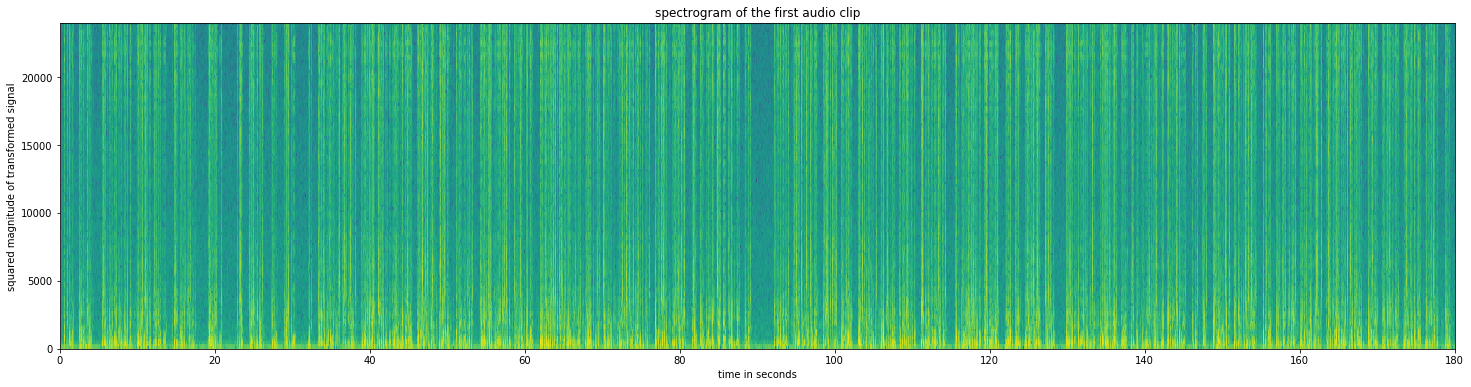

In [6]:
fig = plt.figure(figsize = (25, 6))
ax = fig.add_subplot(111)
ax.set_title('wave plot of the first audio clip')
ax.set_ylabel('normalized frequency')
librosa.display.waveplot(all_voice_files[0], sr = 48000)
plt.show()

fig = plt.figure(figsize = (25, 6))
ax = fig.add_subplot(111)
ax.set_title('spectrogram of the first audio clip')
ax.set_xlabel('time in seconds')
ax.set_ylabel('squared magnitude of transformed signal')
specgram(all_voice_files[0], Fs = 48000)
plt.show()

In [7]:
#in each sample, find 200ms chunks that have a mean over the total average + standard deviation
window_shape = 48000 / 5

voice_data = []
voice_labels = []
voice_number = 0

for voice in all_voice_files:
    positive_full_array = view_as_windows(np.absolute(voice), window_shape)
    positive_full_array = positive_full_array[::int(window_shape / 2)] #keep every nth row, where n is window_shape/2 (For some overlap)
    temp_full_array = view_as_windows(voice, window_shape)
    temp_full_array = temp_full_array[::int(window_shape / 2)]
    
    for window_index in range(len(temp_full_array)):
        if np.mean(positive_full_array[window_index]) > (np.mean(voice) + np.std(voice)):
            voice_data.append(temp_full_array[window_index])
            voice_labels.append(voice_number)
            
    voice_number += 1
    
voice_data = np.array(voice_data)
print("Number of samples:", voice_data.shape)
#normalize the data
#voice_data_normalized = preprocessing.normalize(voice_data)

voice_labels = np.array(voice_labels)
#one-hot encode the labels
voice_labels = np.eye(10)[voice_labels]

print("Number of labels:", voice_labels.shape)

Number of samples: (2703, 9600)
Number of labels: (2703, 10)


In [8]:
#determine how many of each speaker is in the samples/labels dataset
identity_matrix = np.identity(10)
number_of_samples = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(len(voice_labels)):
    for j in range(10):
        number_of_samples[j] += np.sum(np.all(np.equal(voice_labels[i], identity_matrix[j])))

for i in range(10):
    print("Number of samples from voice", i, ':', number_of_samples[i])

Number of samples from voice 0 : 249
Number of samples from voice 1 : 280
Number of samples from voice 2 : 265
Number of samples from voice 3 : 250
Number of samples from voice 4 : 307
Number of samples from voice 5 : 232
Number of samples from voice 6 : 352
Number of samples from voice 7 : 260
Number of samples from voice 8 : 294
Number of samples from voice 9 : 214


In [9]:
#split into training and testing sets - 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(voice_data, voice_labels, test_size = 0.40, random_state = 7)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 7)
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)
print("Validation Set:", X_val.shape, y_val.shape)

Training Set: (1621, 9600) (1621, 10)
Testing Set: (541, 9600) (541, 10)
Validation Set: (541, 9600) (541, 10)


# Attempt #1: K-Nearest Neighbors on the raw data

In [10]:
#Attempt #1: K-Nearest Neighbors on the raw data
def run_knear():
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    model = KNeighborsClassifier(n_neighbors = 10)
    model.fit(X_train, y_train)
    y_prediction = model.predict(X_val)

    print("Validation accuracy:", accuracy_score(y_val, y_prediction))
    
#run_knear()
#4/23/17: Validation Accuracy = 0.112084702446

# Attempt #2: 3-Layer Neural Network on the raw data

In [11]:
#Attempt #2: TensorFlow neural network on raw data with 1000 epochs
#Architecture: Standard 3-layer fully-connected network with relu activation on the hidden layer and softmax on the output.

#parameters:
learning_rate = 0.1
epochs = 500
n_input = 9600
n_classes = 10
n_hidden_layer = 200
num_examples = 1621
batch_size = 128

tf.reset_default_graph()

model01 = tf.Graph()
with model01.as_default():
    with tf.device('/gpu:0'):
        W_fc0_01 = tf.Variable(tf.random_normal([n_input, n_hidden_layer]), name = "W_0_1")
        W_fc1_01 = tf.Variable(tf.random_normal([n_hidden_layer, n_classes]), name = "W_1_1")
        
        b_fc0_01 = tf.Variable(tf.zeros([n_hidden_layer]), name = 'b_0_1')
        b_fc1_01 = tf.Variable(tf.zeros([n_classes]), name = 'b_1_1')
        
        x = tf.placeholder(tf.float32, [None, 9600])
        y = tf.placeholder(tf.float32, [None, 10])
        
        #fully connected relu layer
        layer_1 = tf.add(tf.matmul(x, W_fc0_01), b_fc0_01)
        layer_1 = tf.nn.relu(layer_1)
        
        #full connected softmax output layer
        layer_2 = tf.add(tf.matmul(layer_1, W_fc1_01), b_fc1_01)
        prediction = tf.nn.softmax(layer_2)
        
        #loss and optimizer
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = layer_2, labels = y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
        
        #accuracy
        correct_prediction = tf.equal(tf.argmax(layer_2, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        init = tf.global_variables_initializer()
        
tf.reset_default_graph()

from time import perf_counter as timer

def save_model_1():
    save_file_01 = './train_model_01.ckpt'
    saver_01 = tf.train.Saver({'W_0_1': W_fc0_01,
                              'W_1_1': W_fc1_01,
                              'b_0_1': b_fc0_01,
                              'b_1_1': b_fc1_01})
    return saver_01, save_file_01

def train_01(tfgraph, tfepochs, tfbatch, xtrain, ytrain, xtest, ytest, xval, yval, num_examples, saver, save_file):
    start1 = timer()
    
    with tf.Session(graph = tfgraph) as sess01:
        sess01.run(init)
        
        for epoch in range(tfepochs):
            
            shift_X_train, shift_y_train = shuffle(xtrain, ytrain)
            
            for offset in range(0, num_examples, tfbatch):
                end = offset + tfbatch
                batch_x, batch_y = shift_X_train[offset:end], shift_y_train[offset:end]
                sess01.run(optimizer, feed_dict = {x: batch_x, y: batch_y})
            
            valid_accuracy = sess01.run(accuracy, feed_dict = {x: xval, y: yval})
            
            if epoch % 10 == 0:
                print("Epoch:", epoch)
                print("Validation Accuracy:", valid_accuracy)
            
        saver.save(sess01, save_file)
        print("")
        print("Trained Model Saved.")
        
        test_accuracy = sess01.run(accuracy, feed_dict = {x: xtest, y: ytest})
        print("")
        print("Testing Accuracy:", test_accuracy)
        
    end1 = timer()
    print("")
    print("Time:", end1 - start1)

"""
To re-train the data, remove the "#" mark in front of train_01() on the line below.
"""
#train_01(model01, epochs, batch_size, X_train, y_train, X_test, y_test, X_val, y_val, num_examples, save_model_1()[0], save_model_1()[1])
tf.reset_default_graph

#Neural Network Testing Set Accuracy:
with tf.Session(graph = model01) as sess:
    save_model_1()[0].restore(sess, save_model_1()[1])
    feed_dict = {x: X_test, y: y_test}
    file_writer = tf.summary.FileWriter('./logs/1', sess.graph)
    print('Test Accuracy:', accuracy.eval(feed_dict = feed_dict))
tf.reset_default_graph()

Test Accuracy: 0.700555


# Attempt #3: Convolutional network on spectrograms

In [12]:
#save the train/validation/test spectrograms (200ms each) as numpy arrays
def save_plt_spectrograms():
    start1 = timer()
    #create the spectrogram arrays using matplotlib
    for i in range(len(X_train)):
        fig = plt.figure(figsize = (25, 6), dpi = 25, frameon = False) #set the image size
        extent = matplotlib.transforms.Bbox(((0, 0), (25, 6))) #remove the borders and axes around the image
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        specgram(X_train[i], Fs = 48000)
        plt.savefig('./plt-spectrograms/X_train_spec_{0:04d}.png'.format(i))
        plt.close()

    for i in range(len(X_val)):
        fig = plt.figure(figsize = (25, 6), dpi = 25, frameon = False)
        extent = matplotlib.transforms.Bbox(((0, 0), (25, 6)))
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        specgram(X_val[i], Fs = 48000)
        plt.savefig('./plt-spectrograms/X_val_spec_{0:04d}.png'.format(i))
        plt.close()

    for i in range(len(X_test)):
        fig = plt.figure(figsize = (25, 6), dpi = 25, frameon = False)
        extent = matplotlib.transforms.Bbox(((0, 0), (25, 6)))
        ax = plt.Axes(fig, [0., 0., 1., 1.])
        ax.set_axis_off()
        fig.add_axes(ax)
        specgram(X_test[i], Fs = 48000)
        plt.savefig('./plt-spectrograms/X_test_spec_{0:04d}.png'.format(i))
        plt.close()
        
    end1 = timer()
    print("Time spent creating and saving spectrograms:", end1 - start1) #roughly 15 minutes

#save_plt_spectrograms() #only use this code if saving the spectrograms for the first time.

In [13]:
def load_plt_spectrograms():
    X_train_spec = []
    X_val_spec = []
    X_test_spec = []
    for i in range(len(X_train)):
        temp_train = mpimg.imread('./plt-spectrograms/X_train_spec_{0:04d}.png'.format(i))
        X_train_spec.append(temp_train)
    X_train_spec = np.array(X_train_spec)

    for i in range(len(X_val)):
        temp_val = mpimg.imread('./plt-spectrograms/X_val_spec_{0:04d}.png'.format(i))
        X_val_spec.append(temp_val)
    X_val_spec = np.array(X_val_spec)
    
    for i in range(len(X_test)):
        temp_test = mpimg.imread('./plt-spectrograms/X_test_spec_{0:04d}.png'.format(i))
        X_test_spec.append(temp_test)
    X_test_spec = np.array(X_test_spec)
    
    return X_train_spec, X_val_spec, X_test_spec

X_train_spec, X_val_spec, X_test_spec = load_plt_spectrograms()

print("Finished Loading Matplotlib Spectrograms.")

Finished Loading Matplotlib Spectrograms.


In [14]:
#Create the Convolutional Net Functions
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_5x5(x):
      return tf.nn.max_pool(x, ksize=[1, 5, 5, 1], strides=[1, 5, 5, 1], padding='SAME')
    
#parameters:
learning_rate_2 = 0.01
epochs_2 = 500
num_examples_2 = 1621
batch_size_2 = 32
keep_prob_2 = 0.5
    
tf.reset_default_graph()

model02 = tf.Graph()
with model02.as_default():
    with tf.device('/gpu:0'):
        
        W_conv1 = tf.Variable(tf.truncated_normal(shape = [5, 5, 4, 10], stddev = 0.1), name = "W_0_2")
        W_conv2 = tf.Variable(tf.truncated_normal(shape = [5, 5, 10, 20], stddev = 0.1), name = "W_1_2") 
        W_fc1 = tf.Variable(tf.truncated_normal(shape = [25 * 6 * 20, 1024], stddev = 0.1), name = "W_2_2")
        W_fc2 = tf.Variable(tf.truncated_normal(shape = [1024, 10], stddev = 0.1), name = "W_3_2")

        b_conv1 = tf.Variable(tf.constant(0.1, shape = [10]), name = "b_0_2")
        b_conv2 = tf.Variable(tf.constant(0.1, shape = [20]), name = "b_1_2")
        b_fc1 = tf.Variable(tf.constant(0.1, shape = [1024]), name = "b_2_2")
        b_fc2 = tf.Variable(tf.constant(0.1, shape = [10]), name = "b_3_2")

        x_2 = tf.placeholder(tf.float32, shape = [None, 150, 625, 4])
        y_2 = tf.placeholder(tf.float32, shape = [None, 10])

        layer_1_2 = conv2d(x_2, W_conv1)
        layer_1_2 = tf.add(layer_1_2, b_conv1)
        layer_1_2 = tf.nn.relu(layer_1_2)
        layer_1_2 = max_pool_5x5(layer_1_2)

        layer_2_2 = conv2d(layer_1_2, W_conv2)
        layer_2_2 = tf.add(layer_2_2, b_conv2)
        layer_2_2 = tf.nn.relu(layer_2_2)
        layer_2_2 = max_pool_5x5(layer_2_2)

        layer_3_2 = tf.reshape(layer_2_2, [-1, 25 * 6 * 20])

        layer_4_2 = tf.add(tf.matmul(layer_3_2, W_fc1), b_fc1)
        layer_4_2 = tf.nn.relu(layer_4_2)

        keep_prob = tf.placeholder(tf.float32)
        layer_4_2 = tf.nn.dropout(layer_4_2, keep_prob)

        layer_5_2 = tf.add(tf.matmul(layer_4_2, W_fc2), b_fc2)

        cost_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = layer_5_2, labels = y_2))
        optimizer_2 = tf.train.AdamOptimizer(1e-4).minimize(cost_2)

        correct_prediction_2 = tf.equal(tf.argmax(layer_5_2, 1), tf.argmax(y_2, 1))
        accuracy_2 = tf.reduce_mean(tf.cast(correct_prediction_2, tf.float32))
    
        init = tf.global_variables_initializer()
        
tf.reset_default_graph()

def save_model_2():
    save_file_2 = './train_model_02.ckpt'
    saver2 = tf.train.Saver({"W_0_2": W_conv1,
                            "W_1_2": W_conv2,
                            "W_2_2": W_fc1,
                            "W_3_2": W_fc2,
                            "b_0_2": b_conv1,
                            "b_1_2": b_conv2,
                            "b_2_2": b_fc1,
                            "b_3_2": b_fc2})
    return saver2, save_file_2

def train_02(tfgraph, tfepochs, tfbatch, tfdropout, xtrain, ytrain, xtest, ytest, xval, yval, saver, save_file):
    start1 = timer()
    
    with tf.Session(graph = tfgraph) as sess02:
        sess02.run(init)
        
        for epoch in range(tfepochs):
            
            shuff_X_train, shuff_y_train = shuffle(xtrain, ytrain)
            
            for offset in range(0, num_examples, tfbatch):
                end = offset + tfbatch
                batch_x, batch_y = shuff_X_train[offset:end], shuff_y_train[offset:end]
                sess02.run(optimizer_2, feed_dict = {x_2: batch_x, y_2: batch_y, keep_prob: tfdropout})
            
            shuff_X_val, shuff_y_val = shuffle(xval, yval)
            valid_accuracy = sess02.run(accuracy_2, feed_dict = {x_2: xval[:200], y_2: yval[:200], keep_prob: 1.})
            
            if epoch % 5 == 0:
                print("Epoch:", epoch)
                print("Validation Accuracy:", valid_accuracy)
            
        saver.save(sess02, save_file)
        print("")
        print("Trained Model Saved.")
        
        shuff_X_test, shuff_y_test = shuffle(xtest, ytest)
        test_accuracy = sess02.run(accuracy_2, feed_dict = {x_2: xtest[:200], y_2: ytest[:200], keep_prob: 1.})
        print("")
        print("Testing Accuracy:", test_accuracy)
        
    end1 = timer()
    print("")
    print("Time:", end1 - start1)

#train_02(model02, epochs_2, batch_size_2, keep_prob_2, X_train_spec, y_train, X_test_spec, y_test, X_val_spec, y_val, save_model_2()[0], save_model_2()[1])
tf.reset_default_graph()

#Neural Network Testing Set Accuracy:
with tf.Session(graph = model02) as sess:
    save_model_2()[0].restore(sess, save_model_2()[1])
    feed_dict = {x_2: X_test_spec[:200], y_2: y_test[:200], keep_prob: 1.}
    file_writer = tf.summary.FileWriter('./logs/2', sess.graph)
    print('Test Accuracy:', accuracy_2.eval(feed_dict = feed_dict)) #Test Accuracy 4/26/17: 0.885
tf.reset_default_graph()

Test Accuracy: 0.885


# Attempt #4: STFT Conversion on convolutional networks

This attempt, similar to the previous attempt, will use convolutional networks on spectrograms. However, the method in which the spectrograms are created will be more precise, such that they can be inverted back to the original audio file. STFT is an abbreviation of Short-time Fourier transform, which is what is used to make a spectrogram.

In [15]:
def complex2rgb(complex_array):
    """
    input is an array of complex numbers (stft conversion creates a complex array)
    output is an rgb array with depth = 3
    see the following links for more info on how these equations were used:
    https://en.wikipedia.org/wiki/Color_wheel_graphs_of_complex_functions
    https://en.wikipedia.org/wiki/HSL_and_HSV#From_HSL
    """
    z = complex_array
    h = np.angle(z) / (2 * math.pi)
    l = 2 ** -(np.absolute(z))
    s = 1
    c = (1 - np.absolute(2 * l - 1))
    h_prime = h * 6.
    x = c * (1 - np.absolute(h_prime % 2 - 1))

    array_out = np.zeros_like(complex_array)

    mask1 = (h_prime >= 0) & (h_prime < 1) #(c, x, 0)
    mask2 = (h_prime >= 1) & (h_prime < 2) #(x, c, 0)
    mask3 = (h_prime >= 2) & (h_prime < 3) #(0, c, x)
    mask4 = (h_prime >= 3) & (h_prime < 4) #(0, x, c)
    mask5 = (h_prime >= 4) & (h_prime < 5) #(x, 0, c)
    mask6 = (h_prime >= 5) & (h_prime < 6) #(c, 0, x)

    r = (c * (mask1 | mask6)) + (x * (mask2 | mask5))
    g = (c * (mask2 | mask3)) + (x * (mask1 | mask4))
    b = (c * (mask4 | mask5)) + (x * (mask3 | mask6))

    return np.dstack((r, g, b))

In [16]:
def save_spectrograph():
    for i in range(len(X_train)):
        train_in = X_train[i]
        test_transform = librosa.core.stft(train_in)
        new_image = complex2rgb(test_transform)
        mpimg.imsave("./spectrograms/train_image_{0:04d}.png".format(i), new_image)

    for i in range(len(X_val)):
        val_in = X_val[i]
        val_transform = librosa.core.stft(val_in)
        new_image = complex2rgb(val_transform)
        mpimg.imsave("./spectrograms/val_image_{0:04d}.png".format(i), new_image)


    for i in range(len(X_test)):
        test_in = X_test[i]
        test_transform = librosa.core.stft(test_in)
        new_image = complex2rgb(test_transform)
        mpimg.imsave("./spectrograms/test_image_{0:04d}.png".format(i), new_image)
        
#save_spectrograph()

In [17]:
def load_spectrograph():
    train_out = []
    val_out = []
    test_out = []
    for i in range(len(X_train)):
        temp_train = mpimg.imread('./spectrograms/train_image_{0:04d}.png'.format(i))
        train_out.append(temp_train)
    train_out = np.array(train_out)
    
    for i in range(len(X_val)):
        temp_val = mpimg.imread('./spectrograms/val_image_{0:04d}.png'.format(i))
        val_out.append(temp_val)
    val_out = np.array(val_out)
    
    for i in range(len(X_test)):
        temp_test = mpimg.imread('./spectrograms/test_image_{0:04d}.png'.format(i))
        test_out.append(temp_test)
    test_out = np.array(test_out)
    
    print(train_out.shape)
    print(val_out.shape)
    print(test_out.shape)
    return train_out, val_out, test_out

train_out, val_out, test_out = load_spectrograph()
print("Finished Loading STFT Images.")

(1621, 1025, 19, 4)
(541, 1025, 19, 4)
(541, 1025, 19, 4)
Finished Loading STFT Images.


In [18]:
#Create the Convolutional Net Functions
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
      return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
#parameters:
learning_rate_3 = 0.01
epochs_3 = 100
num_examples_3 = 1621
batch_size_3 = 16
keep_prob_3 = 0.5
    
tf.reset_default_graph()

model03 = tf.Graph()
with model03.as_default():
    with tf.device('/gpu:0'):
        
        W3_conv1 = tf.Variable(tf.truncated_normal(shape = [1, 1, 4, 16], stddev = 0.1), name = "W_0_3")
        W3_conv2 = tf.Variable(tf.truncated_normal(shape = [4, 4, 16, 32], stddev = 0.1), name = "W_1_3") 
        W3_fc1 = tf.Variable(tf.truncated_normal(shape = [41120, 512], stddev = 0.1), name = "W_2_3")
        W3_fc2 = tf.Variable(tf.truncated_normal(shape = [512, 10], stddev = 0.1), name = "W_3_3")

        b3_conv1 = tf.Variable(tf.constant(0.1, shape = [16]), name = "b_0_3")
        b3_conv2 = tf.Variable(tf.constant(0.1, shape = [32]), name = "b_1_3")
        b3_fc1 = tf.Variable(tf.constant(0.1, shape = [512]), name = "b_2_3")
        b3_fc2 = tf.Variable(tf.constant(0.1, shape = [10]), name = "b_3_3")

        x_3 = tf.placeholder(tf.float32, shape = [None, 1025, 19, 4])
        y_3 = tf.placeholder(tf.float32, shape = [None, 10])
        keep_prob = tf.placeholder(tf.float32)

        layer_1_3 = conv2d(x_3, W3_conv1)
        layer_1_3 = tf.add(layer_1_3, b3_conv1)
        layer_1_3 = tf.nn.relu(layer_1_3)
        layer_1_3 = max_pool_2x2(layer_1_3)

        layer_2_3 = conv2d(layer_1_3, W3_conv2)
        layer_2_3 = tf.add(layer_2_3, b3_conv2)
        layer_2_3 = tf.nn.relu(layer_2_3)
        layer_2_3 = max_pool_2x2(layer_2_3)
        layer_2_3_shape = layer_2_3.get_shape().as_list()

        layer_3_3 = tf.reshape(layer_2_3, [-1, layer_2_3_shape[1] * layer_2_3_shape[2] * layer_2_3_shape[3]])

        layer_4_3 = tf.add(tf.matmul(layer_3_3, W3_fc1), b3_fc1)
        layer_4_3 = tf.nn.relu(layer_4_3)
        layer_4_3 = tf.nn.dropout(layer_4_3, keep_prob)

        layer_5_3 = tf.add(tf.matmul(layer_4_3, W3_fc2), b3_fc2)

        cost_3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = layer_5_3, labels = y_3))
        optimizer_3 = tf.train.AdamOptimizer(1e-4).minimize(cost_3)

        correct_prediction_3 = tf.equal(tf.argmax(layer_5_3, 1), tf.argmax(y_3, 1))
        accuracy_3 = tf.reduce_mean(tf.cast(correct_prediction_3, tf.float32))
    
        init = tf.global_variables_initializer()
        
tf.reset_default_graph()

def save_model_3():
    save_file_3 = './train_model_03.ckpt'
    saver3 = tf.train.Saver({"W_0_3": W3_conv1,
                            "W_1_3": W3_conv2,
                            "W_2_3": W3_fc1,
                            "W_3_3": W3_fc2,
                            "b_0_3": b3_conv1,
                            "b_1_3": b3_conv2,
                            "b_2_3": b3_fc1,
                            "b_3_3": b3_fc2})
    return saver3, save_file_3

def train_03(tfgraph, tfepochs, tfbatch, tfdropout, xtrain, ytrain, xtest, ytest, xval, yval, saver, save_file):
    start1 = timer()
    
    with tf.Session(graph = tfgraph) as sess03:
        sess03.run(init)
        
        for epoch in range(tfepochs):
            
            shuff_X_train, shuff_y_train = shuffle(xtrain, ytrain)
            
            for offset in range(0, num_examples, tfbatch):
                end = offset + tfbatch
                batch_x, batch_y = shuff_X_train[offset:end], shuff_y_train[offset:end]
                sess03.run(optimizer_3, feed_dict = {x_3: batch_x, y_3: batch_y, keep_prob: tfdropout})
            
                       
            if epoch % 5 == 0:
                shuff_X_val, shuff_y_val = shuffle(xval, yval)
                valid_accuracy = sess03.run(accuracy_3, feed_dict = {x_3: xval[:200], y_3: yval[:200], keep_prob: 1.})
                
                global temp_visualization_x #for plotting the validation accuracy during training
                temp_visualization_x.append(epoch)
                
                global temp_visualization_y #for plotting the validation accuracy during training
                temp_visualization_y.append(valid_accuracy)
                
                print("Epoch:", epoch)
                print("Validation Accuracy:", valid_accuracy)
                
            
        saver.save(sess03, save_file)
        print("")
        print("Trained Model Saved.")
        
        shuff_X_test, shuff_y_test = shuffle(xtest, ytest)
        test_accuracy = sess03.run(accuracy_3, feed_dict = {x_3: xtest[:200], y_3: ytest[:200], keep_prob: 1.})
        print("")
        print("Testing Accuracy:", test_accuracy)
        
    end1 = timer()
    print("")
    print("Time:", end1 - start1)

temp_visualization_x = []
temp_visualization_y = []
#train_03(model03, epochs_3, batch_size_3, keep_prob_3, train_out, y_train, test_out, y_test, val_out, y_val, save_model_3()[0], save_model_3()[1])
tf.reset_default_graph()

#Neural Network Testing Set Accuracy:
start1 = timer()
with tf.Session(graph = model03) as sess:
    save_model_3()[0].restore(sess, save_model_3()[1])
    feed_dict = {x_3: test_out, y_3: y_test, keep_prob: 1.}
    file_writer = tf.summary.FileWriter('./logs/3', sess.graph)
    print('Test Accuracy:', accuracy_3.eval(feed_dict = feed_dict))
tf.reset_default_graph()
end1 = timer()
print("Time to classify and calculate testing accuracy:", end1 - start1)

Test Accuracy: 0.939002
Time to classify and calculate testing accuracy: 1.3806521278538813


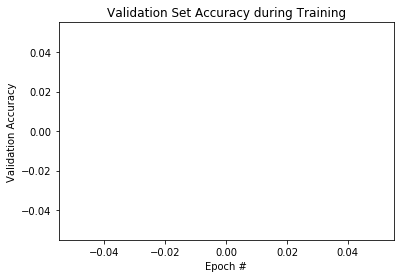

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Epoch #')
ax.set_ylabel('Validation Accuracy')
ax.set_title('Validation Set Accuracy during Training')
ax.scatter(temp_visualization_x, temp_visualization_y)

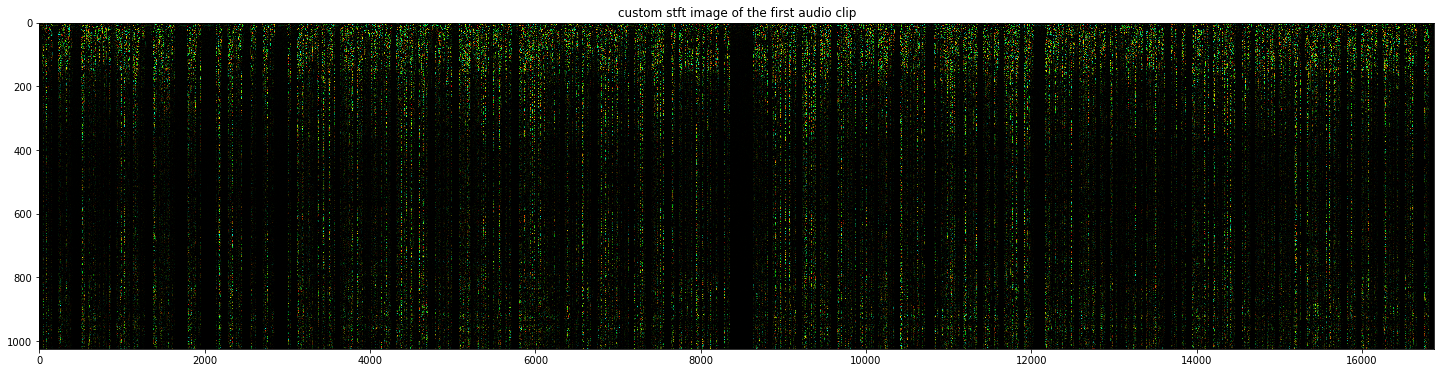

In [25]:
train_in = all_voice_files[0]
test_transform = librosa.core.stft(train_in)
new_image = complex2rgb(test_transform)
mpimg.imsave("voice_01_stft.png", new_image)
temp_train = mpimg.imread("voice_01_stft.png")

fig = plt.figure(figsize = (25, 6))
ax = fig.add_subplot(111)
ax.set_title('custom stft image of the first audio clip')
ax.imshow(temp_train, aspect = 'auto')
plt.show()